# trim_disconnected_blobs
an example for the use of porespy.filters.trim_disconnected_blobs

Removes voxels that aren't connected to inlets.

## Import packages

In [1]:
import numpy as np
import porespy as ps
import scipy.ndimage as spim
import scipy
import matplotlib.pyplot as plt
import skimage

## Create image and variables:

--------------------------------------------------------------------------------
RSA: Adding spheres of size 3
Initial volume fraction: 0.0
Dilating foreground features by sphere radius
Regenerating free_sites after 1338 iterations
Regenerating free_sites after 1627 iterations
Regenerating free_sites after 1672 iterations
Number of spheres inserted: 1673
Final volume fraction: 0.4647222222222222
--------------------------------------------------------------------------------
RSA: Adding spheres of size 3
Initial volume fraction: 0.0
Dilating foreground features by sphere radius
Number of spheres inserted: 37
Final volume fraction: 0.010277777777777778


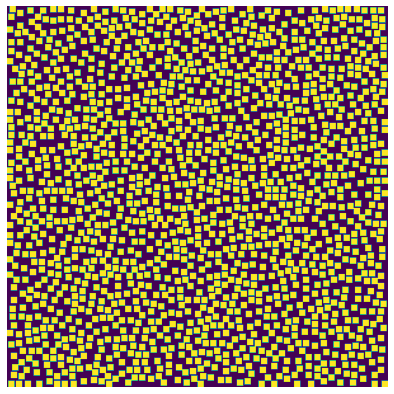

In [2]:
im = np.zeros([300, 300])
#im = ps.generators.RSA(im, radius=25, volume_fraction=0.3)
im = ps.generators.RSA(im, radius=3, volume_fraction=0.7)
inlets = np.zeros([300, 300])
inlets  = ps.generators.RSA(inlets, radius=3, volume_fraction=0.01)

plt.figure(figsize=[7, 7])
plt.imshow(im);
plt.axis(False)

#default values:
strel = None

## Apply filter function:
With different parameters

### inlets

Text(0.5, 1.0, 'inlets = blobs - result')

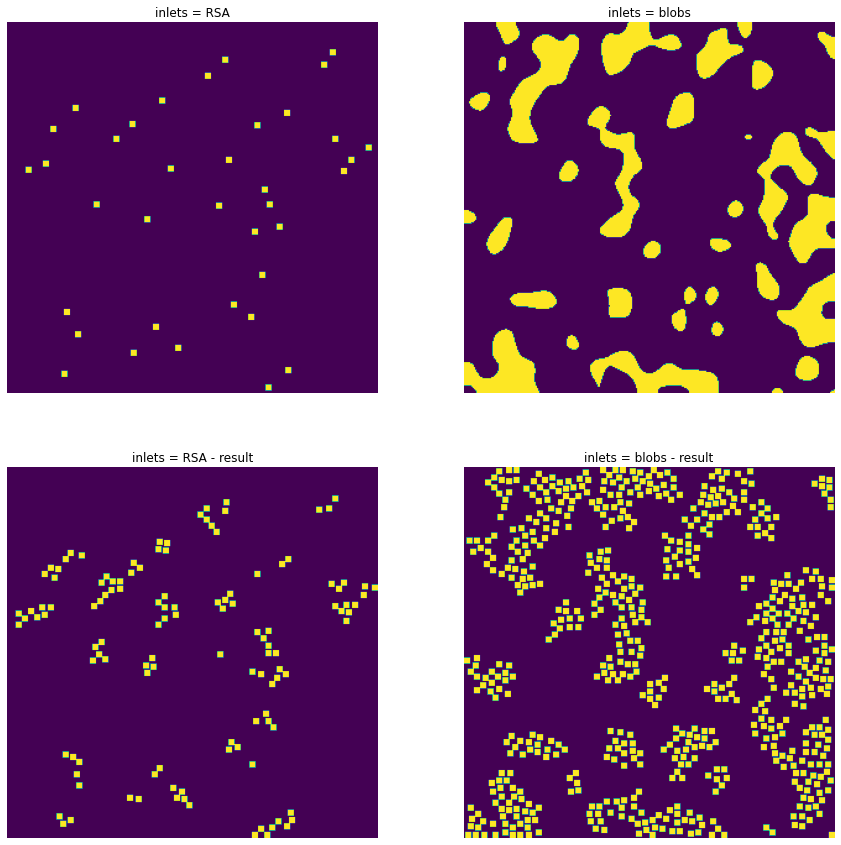

In [3]:
x = ps.filters.trim_disconnected_blobs(im, inlets, strel)

in2  = ps.generators.blobs([300,300], 0.2)
xx = ps.filters.trim_disconnected_blobs(im, in2, strel)

fig, ax = plt.subplots(2, 2, figsize=[15, 15]);
ax[0,0].imshow(inlets);
ax[0,1].imshow(in2);
ax[0,0].axis(False)
ax[0,1].axis(False)
ax[0,0].set_title('inlets = RSA')
ax[0,1].set_title('inlets = blobs')

ax[1,0].imshow(x);
ax[1,1].imshow(xx);
ax[1,0].axis(False)
ax[1,1].axis(False)
ax[1,0].set_title('inlets = RSA - result')
ax[1,1].set_title('inlets = blobs - result')

### strel

Text(0.5, 1.0, 'strel = [100,300]')

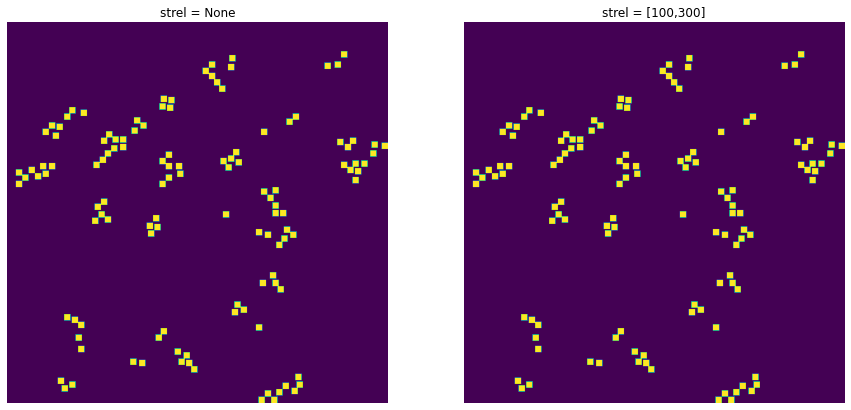

In [4]:
xx = ps.filters.trim_disconnected_blobs(im, inlets, [100,300])
fig, ax = plt.subplots(1, 2, figsize=[15, 15]);

ax[0].imshow(x);
ax[1].imshow(xx);
ax[0].axis(False)
ax[1].axis(False)
ax[0].set_title('strel = None')
ax[1].set_title('strel = [100,300]')